<a href="https://colab.research.google.com/github/Exequieelxc/Definitivo/blob/main/Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Te damos la bienvenida a Colab</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Novedad&#41; Prueba la API de Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Si ya conoces Colab, echa un vistazo a este vídeo para obtener información sobre las tablas interactivas, la vista del historial de código ejecutado y la paleta de comandos.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  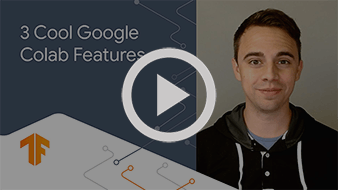
  </a>
</center>

In [2]:
# prompt: lee como dataframe el archivo csv

import pandas as pd

# Reemplaza 'nombre_del_archivo.csv' con el nombre real de tu archivo CSV
df = pd.read_csv('/content/pinguinos_limpios_codificados_normalizados.csv')

# Muestra las primeras 5 filas del DataFrame
print(df.head())


   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_id  \
0          0.254545         0.666667           0.152542     0.291667     1.0   
1          0.269091         0.511905           0.237288     0.305556     0.0   
2          0.298182         0.583333           0.389831     0.152778     0.0   
3          0.167273         0.738095           0.355932     0.208333     0.0   
4          0.261818         0.892857           0.305085     0.263889     1.0   

   species_id  island_id  
0           0        1.0  
1           0        1.0  
2           0        1.0  
3           0        1.0  
4           0        1.0  


In [23]:
# prompt: Usa train test split para separar el df

from sklearn.model_selection import train_test_split

# Suponiendo que 'especie' es tu columna objetivo
X = df.drop('species_id', axis=1)  # Características
y = df['species_id']  # Variable objetivo

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)  # Ajusta test_size y random_state según tus necesidades

# Imprime las formas de los conjuntos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


Forma de X_train: (266, 6)
Forma de X_test: (67, 6)
Forma de y_train: (266,)
Forma de y_test: (67,)


In [24]:
# prompt: Arma un arbol de decision usando sckit learn para clasificar

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Crea una instancia del clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)  # Ajusta parámetros según tus necesidades

# Entrena el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcula la precisión del modelo


In [25]:
# prompt: evalua el modelo con accuracy, precision, f1 y recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Precisión:", accuracy)
print("Precisión (Precision):", precision)
print("Exhaustividad (Recall):", recall)
print("Puntuación F1:", f1)


Precisión: 0.9850746268656716
Precisión (Precision): 0.9860696517412935
Exhaustividad (Recall): 0.9850746268656716
Puntuación F1: 0.9852010365594893


In [29]:
# prompt: Evalua el modelo con acurracy, precision, f1 y recall para cada species

from sklearn.metrics import classification_report

# Obtén el informe de clasificación
report = classification_report(y_test, y_pred, output_dict=True)

# Imprime las métricas para cada clase (especie)
for species_id in report:
  if species_id.isdigit():  # Asegúrate de que sea un ID de especie
    print(f"\nMetrics for species {species_id}:")
    print("Accuracy:", report[species_id]['precision'])
    print("Precision:", report[species_id]['precision'])
    print("Recall:", report[species_id]['recall'])
    print("F1-score:", report[species_id]['f1-score'])



Metrics for species 0:
Accuracy: 1.0
Precision: 1.0
Recall: 0.9655172413793104
F1-score: 0.9824561403508771

Metrics for species 1:
Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
Recall: 1.0
F1-score: 0.9655172413793104

Metrics for species 2:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


Matriz de Confusión:
[[28  1  0]
 [ 0 14  0]
 [ 0  0 24]]


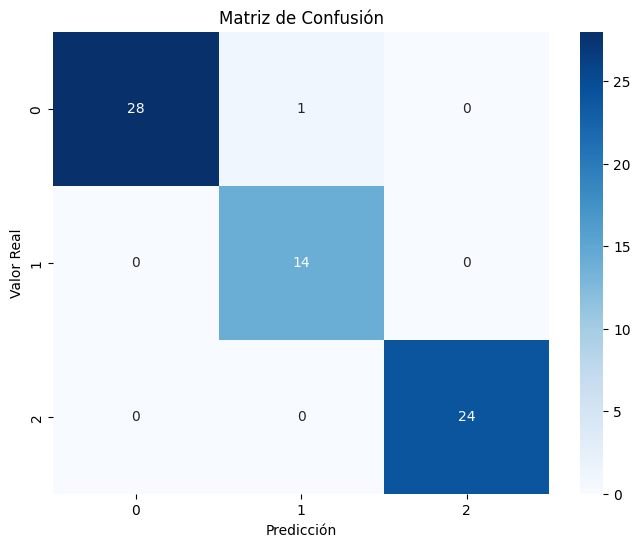

In [26]:
# prompt: arma una matriz de confusion para las especies

from sklearn.metrics import confusion_matrix
import numpy as np

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Imprime la matriz de confusión
print("Matriz de Confusión:")
print(cm)

# Puedes visualizar la matriz de confusión con seaborn (opcional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


In [30]:
# prompt: Leeme como dataframe el csv

import pandas as pd

# Reemplaza 'nombre_del_archivo.csv' con el nombre real de tu archivo CSV
df = pd.read_csv('/content/titanic_procesado.csv')

# Muestra las primeras 5 filas del DataFrame
print(df.head())


   Unnamed: 0  PassengerId  Survived  Pclass  \
0           0            1         0       3   
1           1            2         1       1   
2           2            3         1       3   
3           3            4         1       1   
4           4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  
0      0         A/5 21171   7.2500  
1      0          PC 17599  71.2833  
2      0  STON/O2. 3101282   7.9250  
3      0            113803  53.1000  
4      0            373450   8.0500  


In [31]:
# prompt: Quiero tener las siguientes clases, Clases, Sexo, Edad, y cantidad de Parientes

# Selecciona las columnas deseadas
df_seleccionado = df[['Pclass', 'Sex', 'Age', 'SibSp']]

# Muestra las primeras 5 filas del DataFrame seleccionado
print(df_seleccionado.head())


   Pclass     Sex   Age  SibSp
0       3    male  22.0      1
1       1  female  38.0      1
2       3  female  26.0      0
3       1  female  35.0      1
4       3    male  35.0      0


In [44]:
# prompt: Quiero cambiar el sexo a numerico que 0 sea femenino y 1 masculino

import pandas as pd
# Reemplaza 'nombre_del_archivo.csv' con el nombre real de tu archivo CSV
df = pd.read_csv('/content/titanic_procesado.csv')

# Muestra las primeras 5 filas del DataFrame
print(df.head())


# Selecciona las columnas deseadas
df_seleccionado = df[['Pclass', 'Sex', 'Age', 'SibSp']]

# Muestra las primeras 5 filas del DataFrame seleccionado
print(df_seleccionado.head())

# Reemplaza 'Sex' con el nombre de tu columna de sexo
df_seleccionado['Sex'] = df_seleccionado['Sex'].map({'female': 0, 'male': 1})

# Muestra las primeras 5 filas del DataFrame con la columna de sexo actualizada
print(df_seleccionado.head())


   Unnamed: 0  PassengerId  Survived  Pclass  \
0           0            1         0       3   
1           1            2         1       1   
2           2            3         1       3   
3           3            4         1       1   
4           4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  
0      0         A/5 21171   7.2500  
1      0          PC 17599  71.2833  
2      0  STON/O2. 3101282   7.9250  
3      0            113803  53.1000  
4      0            373450   8.0500  
   Pclass     Sex   

<ipython-input-44-5f4ba1a23b5b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['Sex'] = df_seleccionado['Sex'].map({'female': 0, 'male': 1})


In [45]:
# prompt: muestrame el dataset modificado

print(df_seleccionado)


     Pclass  Sex        Age  SibSp
0         3    1  22.000000      1
1         1    0  38.000000      1
2         3    0  26.000000      0
3         1    0  35.000000      1
4         3    1  35.000000      0
..      ...  ...        ...    ...
886       2    1  27.000000      0
887       1    0  19.000000      0
888       3    0  27.915709      1
889       1    1  26.000000      0
890       3    1  32.000000      0

[891 rows x 4 columns]


In [49]:
# prompt: Quiero separar en X el Sex, Age, SibSp y Pclass y en Y la columna Survived con los datos ya actualizados

X = df_seleccionado[['Sex', 'Age', 'SibSp', 'Pclass']]
y = df['Survived']

print(X.head())
print(y.head())


   Sex   Age  SibSp  Pclass
0    1  22.0      1       3
1    0  38.0      1       1
2    0  26.0      0       3
3    0  35.0      1       1
4    1  35.0      0       3
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


Precisión del modelo: 0.7653631284916201
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       105
           1       0.75      0.65      0.70        74

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179

Matriz de confusión:
[[89 16]
 [26 48]]


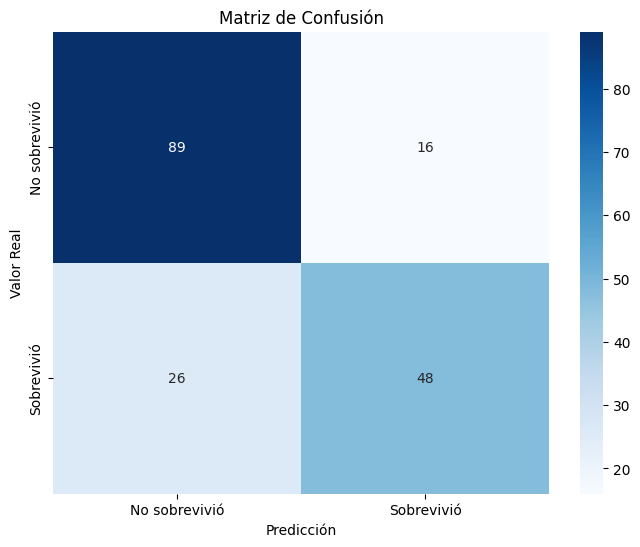

In [50]:
# prompt: Ahora muestrame un clasificador si la persona sobrevivio o no

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrena el modelo
clf.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Imprime un informe de clasificación
print(classification_report(y_test, y_pred))

# Crea una matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Visualiza la matriz de confusión (opcional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()
